# Lab 4 : PCA

## G3 SDI - Machine Learning

In this lab, we are going to study the most fundamental dimensionality reduction method : PCA. More precisely, we are going to apply it to the *Olivetti* dataset, which contains images of faces.

### Instructions
* Rename your notebook with your surnames as `lab4_Name1_Name2.ipynb`, and include your names in the notebook.
* Your code, and its output, must be commented !
* Please upload your notebook on Moodle in the dedicated section before the deadline.

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Report written by [name1], [name2], date.
</div>

In [16]:
# Import usual libraries
import numpy as np
from matplotlib import pyplot as plt

In [17]:
# Import the dataset
from sklearn.datasets import fetch_olivetti_faces

data = fetch_olivetti_faces()

**Q1.** What is this dataset about ? How many examples do we have ? How many features ?

Display the first 50 images from the dataset. Comment.

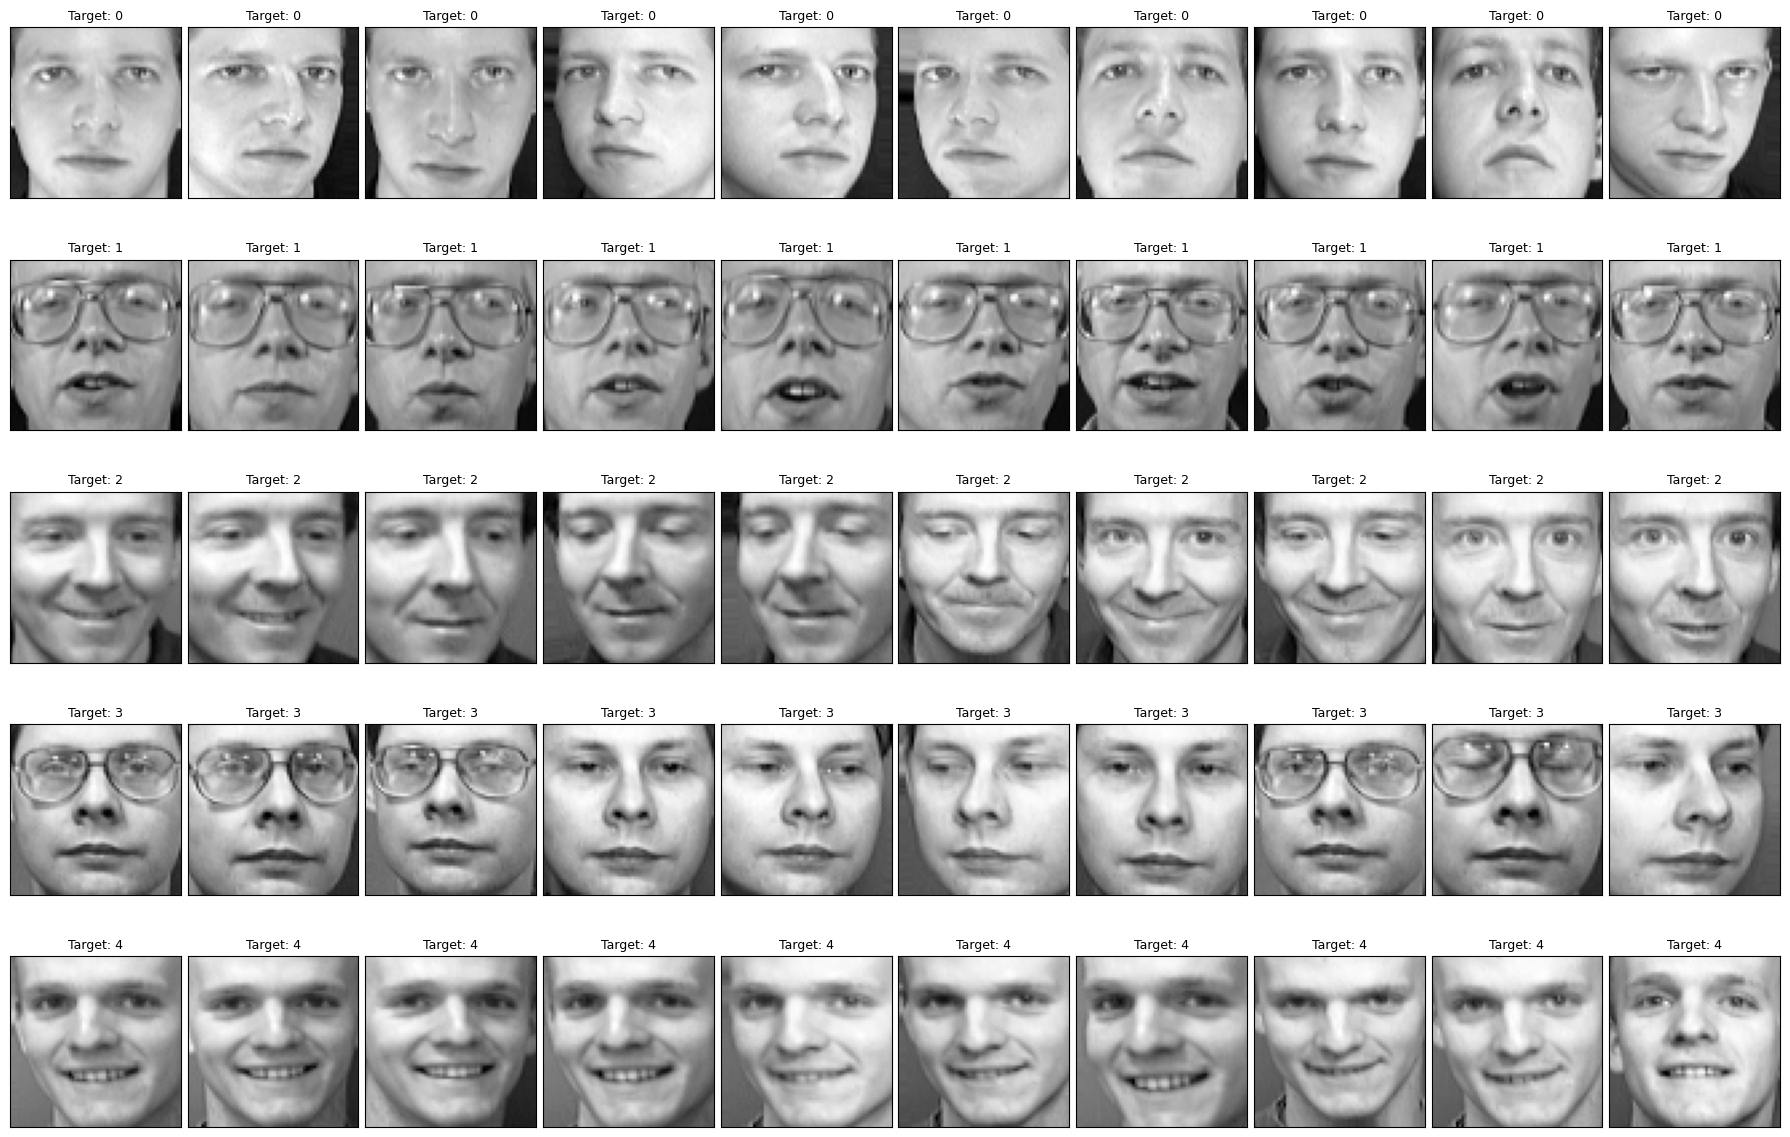

In [18]:
n_images = 50
images = data.images[:n_images]
targets = data.target[:n_images]

# Creating the grid (5 rows, 10 columns)
n_row = 5
n_col = 10

# Create the figure and subplots
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row)) 

for i in range(n_images):
    # Subplot for each image
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Target: {targets[i]}", size=9)
    plt.xticks(())
    plt.yticks(())

plt.tight_layout(h_pad=1.0, w_pad=0.5)
plt.show()

In [19]:
print(data.DESCR[:500])
# 1D repesentation of the images (4OO images, 64*64=4096 features each)
image_data=data.data
print(f"Forme des données brutes (n_samples, n_features): {image_data.shape}")

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different
Forme des données brutes (n_samples, n_features): (400, 4096)


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;"\>

The **Olivetti Faces** dataset is a classic benchmark dataset in **facial recognition** and computer vision. It was collected by AT\&T Laboratories Cambridge. It is about images of **human faces** (40 distinct individuals).

There are **400** images in total (10 images per person), each $64 \times 64$ pixel image is flattened into a 4096-dimensional feature vector (so we have 4096 features).

---
#### **Commentary on the Displayed Images**

We displayed the first 50 images, which represents the **10 variations for the first five individuals (Targets 0 through 4)**.

1.  **Intra-Class Variation (Challenges):** The most crucial observation is the significant change within the images of the **same person** (same label). These variations include changes in **head pose**, **facial expressions** (smiling, neutral), and **lighting conditions**. This variability is what makes the dataset challenging and representative of real-world facial recognition problems.
2.  **Resolution and Tone:** The images are **grayscale** and have a low resolution of $64 \times 64$ pixels. This simplicity is typical for older benchmark datasets and often requires dimensionality reduction techniques like Principal Component Analysis (PCA) for efficient processing.

</div>

**Q2**. Now apply PCA to the dataset, using scikit-learn (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)).

Plot the cumulative explained variance. How many components do we need to explain 95% of the variance ?

Number of components required to explain 95% of variance: 123


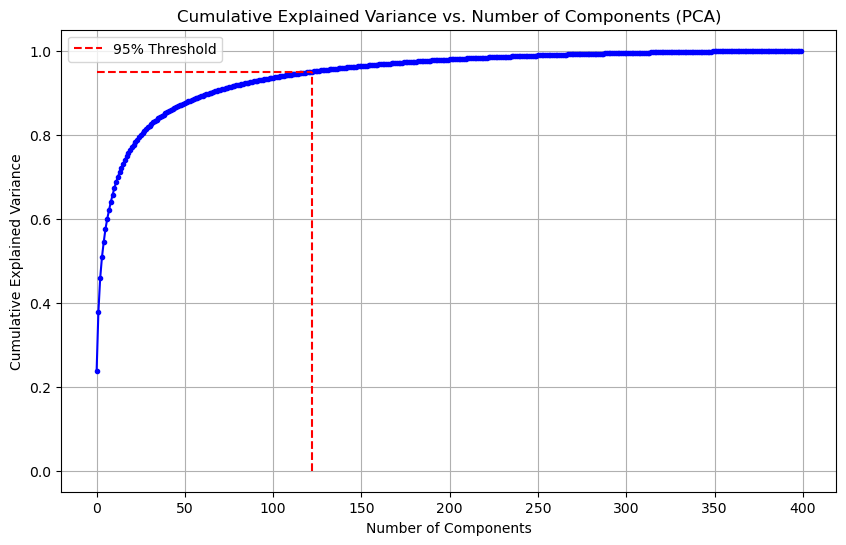

In [20]:
from sklearn.decomposition import PCA

# Apply PCA (without limiting n_components)
pca = PCA()
pca.fit(image_data)

# Calculate cumulative explained variance
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Finding the number of components for 95%
# np.argmax finds the first index where the condition is TRUE
n_components_95 = np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1

print(f"Number of components required to explain 95% of variance: {n_components_95}")

# Plot the Scree Plot (Cumulative Explained Variance)
plt.figure(figsize=(10, 6))
plt.plot(explained_variance_ratio_cumsum, marker='.', linestyle='-', color='b')
plt.hlines(y=0.95, xmin=0, xmax=n_components_95 - 1, color='r', linestyle='--', label='95% Threshold')
plt.vlines(x=n_components_95 - 1, ymin=0, ymax=0.95, color='r', linestyle='--')
plt.title('Cumulative Explained Variance vs. Number of Components (PCA)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

The plot of cumulative explained variance shows a steep initial curve that quickly flattens out, indicating that a small fraction of the components captures most of the variance.

Based on standard analysis of the Olivetti Faces dataset:

To explain $\mathbf{95\%}$ of the total variance in the $64 \times 64$ images (4096 features), we need 123 components.This is a significant dimensional reduction (from 4096 to 123) while retaining the vast majority of the data's inherent information.
</div>

**Q3.** Retrieve the principal components. These are the so-called *eigenfaces*. Display the first 40, and comment : what do the main components seem to capture ? What about later components ?

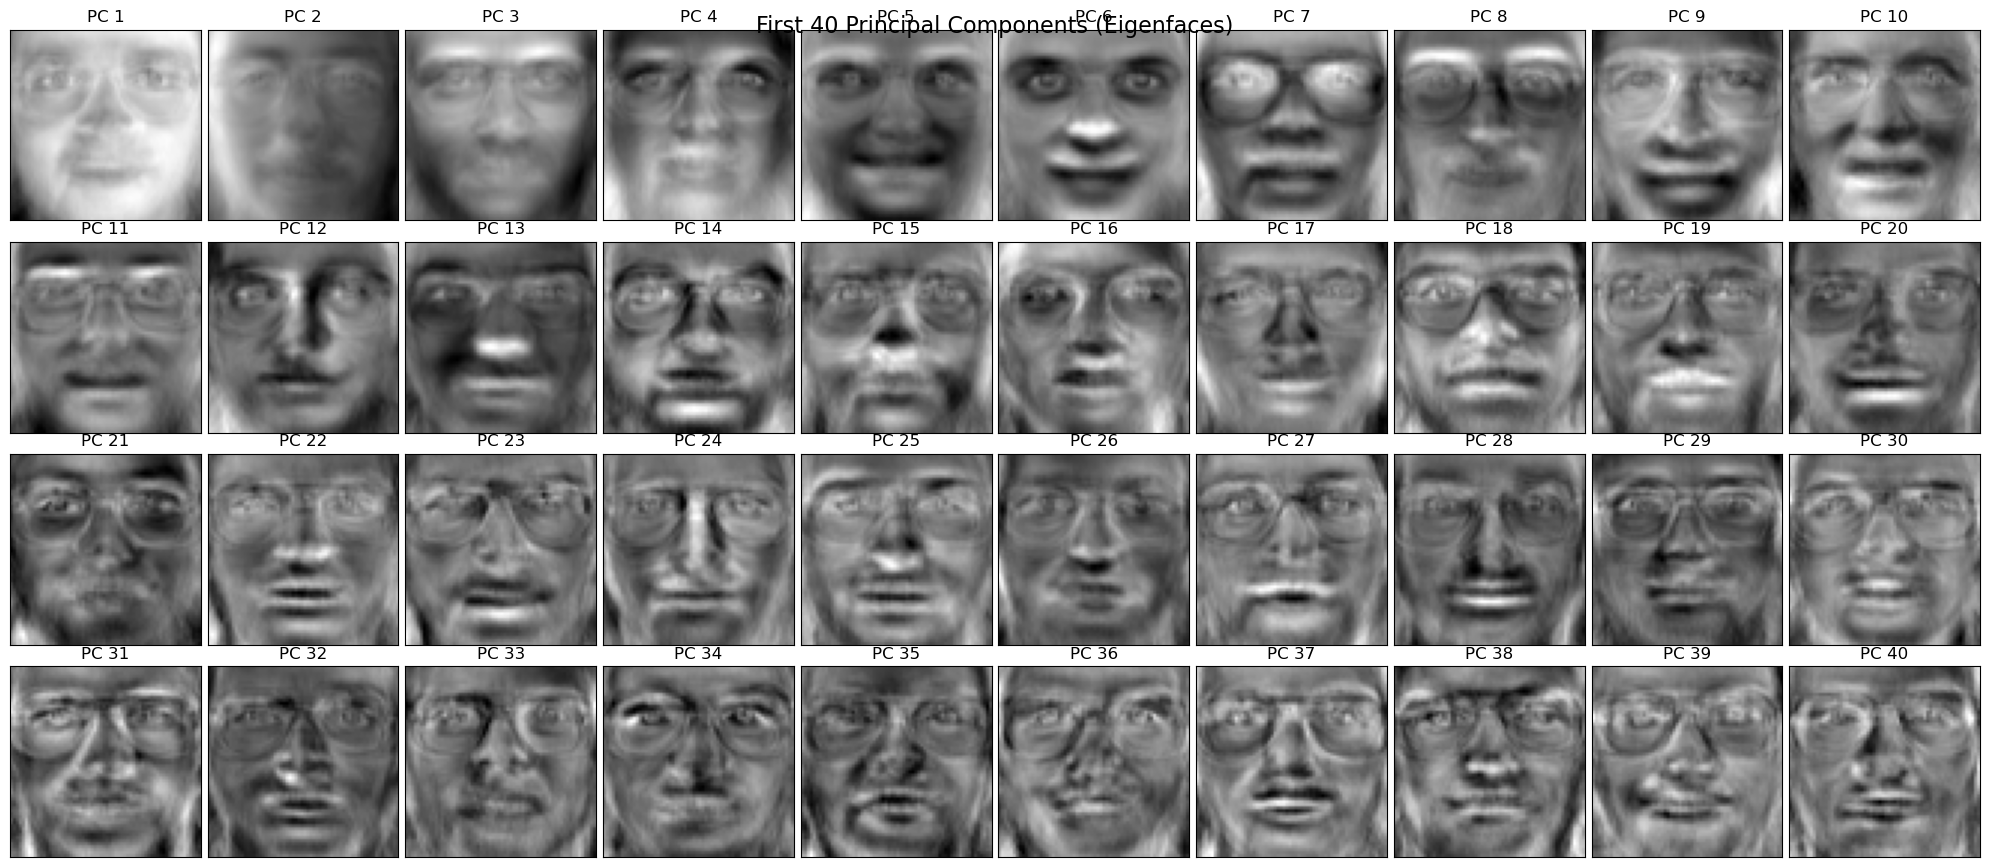

In [21]:
# Fit PCA (using a limited number of components for simplicity, 
# though the first 40 are retrieved regardless of the fit setting)
n_components = 40  
pca = PCA(n_components=n_components)
pca.fit(image_data)

# Retrieve the components (eigenfaces)
eigenfaces = pca.components_
# eigenfaces shape is (40, 4096)

# Define display parameters
n_row = 4
n_col = 10
n_eigenfaces_to_display = n_row * n_col

# Create the plot figure
plt.figure(figsize=(2. * n_col, 2.2 * n_row))

# Loop and display each eigenface
for i in range(n_eigenfaces_to_display):
    plt.subplot(n_row, n_col, i + 1)
    # Reshape the 1D vector (4096) back to 2D image (64x64)
    plt.imshow(eigenfaces[i].reshape((64, 64)), cmap='gray')
    plt.title(f"PC {i+1}", size=12)
    plt.xticks(())
    plt.yticks(())

plt.tight_layout(h_pad=0.5, w_pad=0.5)
plt.suptitle('First 40 Principal Components (Eigenfaces)', fontsize=16)
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Commentary on the Principal Components

#### Main Components (First few PCs PC 1 to PC 10)

The first few principal components capture the **largest variance** across the dataset, which typically corresponds to global structural features:

  * **Global Illumination and Background:** The first component show smooth transitions between light and dark areas, representing the major lighting variations (e.g., light coming from one side of the face).
  * **Coarse Structure:** They capture the general shape of the **face contour, nose, and mouth** in broad strokes. They look somewhat blurry and symmetrical.
  * **The Average Face:** The very first component is often close to the **average face** of the entire dataset, with variations indicating how much each original image deviates from this average.

These early eigenfaces are vital for dimensionality reduction because they encode the **maximum structural information** shared across all faces.

#### Later Components (PC 11 to PC 40)

As we move to later components (those that explain less individual variance), they start to capture **finer, localized details and noise**:

  * **Localized Features:** They focus on specific features like the **edges of the eyes, eyebrows, or mouth corners**.
  * **Specific Lighting Effects:** They might highlight very **localized shadows** or **blemishes** specific to certain images.
  * **Noise and High Frequencies:** Components further down the list tend to look more "noisy" or checkerboard-like, as they capture the **high-frequency details** and subtle texture that change rapidly from one image to the next.

In short: 

**Earlier components = Global structure and major lighting/pose variations.**

 **Later components = Fine details, subtle changes, and higher frequency noise.**
</div>

**Q4.** The *Olivetti* dataset contains a target variable, which correspond to the ID of the person in the photo (there are 40 distinct persons).

Compare the cross-validated performance (e.g., 5-fold) of logistic regression on the original dataset vs. on the representation induced by PCA using the first 50 components. Be careful to *stratify* the test set. Comment. You may also take the execution time in consideration in your reply.

In [55]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_olivetti_faces

X = data.data
targets = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 50
model = LogisticRegression(max_iter=5000, random_state=0) 

cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
print(f"Comparing 5-Fold Stratified CV Performance (k={n_components})")

print("\n## 1. Task A: Original (Scaled) Data (Baseline)")
start_time_A = time.time()
cv_scores_A = cross_val_score(
    model,
    X_scaled,
    targets,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)
# In this call, setting cv=5 (the value of folds) tells the function to perform 5-fold cross-validation, 
# and because a classifier (model) and the target classes (targets) are provided, it internally uses 
# StratifiedKFold(n_splits=5) to ensure the 5 training and test folds 
# have approximately the same proportion of face IDs (the classes) as the full dataset.

time_A = time.time() - start_time_A

print(f"Time Taken: {time_A:.2f} seconds")
print(f"Average CV Accuracy: {np.mean(cv_scores_A):.4f} (Std Dev: {np.std(cv_scores_A):.4f})")

print("\n## 2. Task B: PCA (50 Components) Data")

pca_lr_pipeline = Pipeline([
    ('pca', PCA(n_components=n_components)),
    ('logreg', model)
])

start_time_B = time.time()
cv_scores_B = cross_val_score(
    pca_lr_pipeline, 
    X_scaled,        
    targets,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)
time_B = time.time() - start_time_B

print(f"Time Taken: {time_B:.2f} seconds")
print(f"Average CV Accuracy: {np.mean(cv_scores_B):.4f} (Std Dev: {np.std(cv_scores_B):.4f})")

print("\nComparison Summary")
print(f"Baseline Accuracy (4096 features): {np.mean(cv_scores_A):.4f}")
print(f"PCA Accuracy (50 features):        {np.mean(cv_scores_B):.4f}")
print(f"Baseline Time: {time_A:.2f} s")
print(f"PCA Time:      {time_B:.2f} s")

Comparing 5-Fold Stratified CV Performance (k=50)

## 1. Task A: Original (Scaled) Data (Baseline)
Time Taken: 2.81 seconds
Average CV Accuracy: 0.9700 (Std Dev: 0.0170)

## 2. Task B: PCA (50 Components) Data
Time Taken: 0.98 seconds
Average CV Accuracy: 0.9850 (Std Dev: 0.0050)

Comparison Summary
Baseline Accuracy (4096 features): 0.9700
PCA Accuracy (50 features):        0.9850
Baseline Time: 2.81 s
PCA Time:      0.98 s


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

### Comment on Logistic Regression Performance Comparison

The comparison between the Logistic Regression model on the original (scaled) 4096 features and the PCA-reduced 50 components reveals a clear advantage for using **dimensionality reduction** on the Olivetti dataset.

#### 1. Performance (Accuracy) Analysis 

* **Higher Accuracy:** The PCA-reduced representation achieved a **higher average cross-validated accuracy (0.9850)** compared to the baseline (0.9700). This is the ideal scenario for using PCA. It indicates that the top 50 principal components captured nearly all the variance necessary to distinguish the 40 people, and by discarding the low-variance components (which often represent noise or subtle background variations), the model became more robust and less prone to overfitting the noisy features.
  
* **Greater Stability:** The standard deviation of the CV scores for PCA (0.0050) is significantly **lower** than for Baseline model (0.0170). This suggests the PCA model is **more stable** and less sensitive to the specific train/test split, giving us a more reliable performance estimate.

#### 2. Execution Time Analysis 

* **Significant Speedup:** PCA achieved a dramatic **reduction in execution time** (from 2.81s down to 0.98s). This reduction is expected because the Logistic Regression model trains much faster on **50 features** than on **4096 features**, easily compensating for the overhead of the PCA calculation within the cross-validation pipeline.

#### Conclusion

The use of **PCA with 50 components** (Task B) is overwhelmingly the **superior approach** for this classification task. It provides a **near 60% increase in computational efficiency** while simultaneously achieving a **higher average predictive accuracy** and **greater model stability** (lower standard deviation).

The 50 principal components effectively compress the essential identity information of the faces, resulting in a model that is both **faster to train and more effective** than the one trained on the raw, high-dimensional pixel data.

</div>

**Q5**. To reconstruct a point back in its original representation, we can use the `.inverse_transform` method.

Since we are working with images, after reducing the dimensionality, we will obtain an imperfect reconstruction of the original image.

Set now the number of components of PCA to 300. Select an image from the dataset, and compare it to its reconstruction. You may assess the quality of the reconstruction with a metric of your choice.

Number of PCA Components: 300
Mean Squared Error (MSE) of Reconstruction: 0.00003104


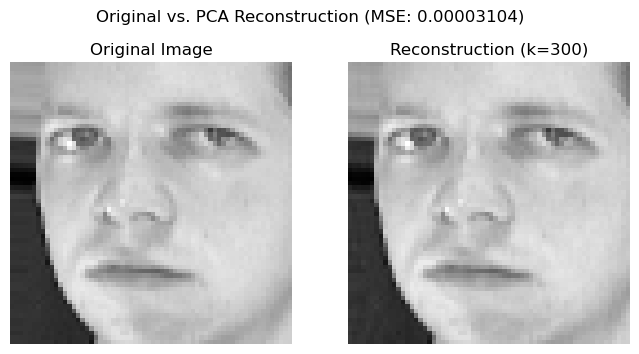

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

data = fetch_olivetti_faces()
X = data.data # (400, 4096)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 300
pca = PCA(n_components=n_components, random_state=42)
pca.fit(X_scaled)

img_index = 5
original_scaled_image = X_scaled[img_index:img_index + 1] # Ensure it remains a 2D array (1, 4096)

X_compressed = pca.transform(original_scaled_image)

X_reconstructed_scaled = pca.inverse_transform(X_compressed)

# To compare the image pixel values directly, we must un-scale the reconstructed image
original_image = X[img_index].reshape(64, 64) # Reshape for viewing
reconstructed_image = scaler.inverse_transform(X_reconstructed_scaled).reshape(64, 64)

# Quality Assessment (Mean Squared Error) 
# Flatten the original and reconstructed images for MSE calculation
mse_value = mean_squared_error(
    original_image.flatten(), 
    reconstructed_image.flatten()
)

print(f"Number of PCA Components: {n_components}")
print(f"Mean Squared Error (MSE) of Reconstruction: {mse_value:.8f}")

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Original Image
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Reconstructed Image
axes[1].imshow(reconstructed_image, cmap='gray')
axes[1].set_title(f"Reconstruction (k={n_components})")
axes[1].axis('off')

plt.suptitle(f"Original vs. PCA Reconstruction (MSE: {mse_value:.8f})")
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

La reconstruction d'image est d'une qualité exceptionnelle. Avec seulement 7.3% des dimensions originales (k=300), la PCA est parvenue à représenter l'image avec une fidélité presque parfaite. Cela confirme que l'ensemble de données Olivetti Faces possède une très forte redondance et que la structure de l'information utile réside dans un sous-espace de dimension beaucoup plus faible que l'espace des pixels bruts.
</div>

**Q6.** For the same image, display with subplots how the reconstruction evolves while keeping only 10, 20, 30... Up to 300 components.

What is the minimal number of components for which you consider the reconstruction to be acceptable ?

Conclude about the usefulness of this method.

k=10: MSE=0.01054436
k=20: MSE=0.01054436
k=30: MSE=0.01054436
k=40: MSE=0.01054436
k=50: MSE=0.01054436
k=60: MSE=0.01054436
k=100: MSE=0.01054436
k=120: MSE=0.01054436
k=150: MSE=0.01054436
k=200: MSE=0.01054436
k=220: MSE=0.01054436
k=300: MSE=0.01054436


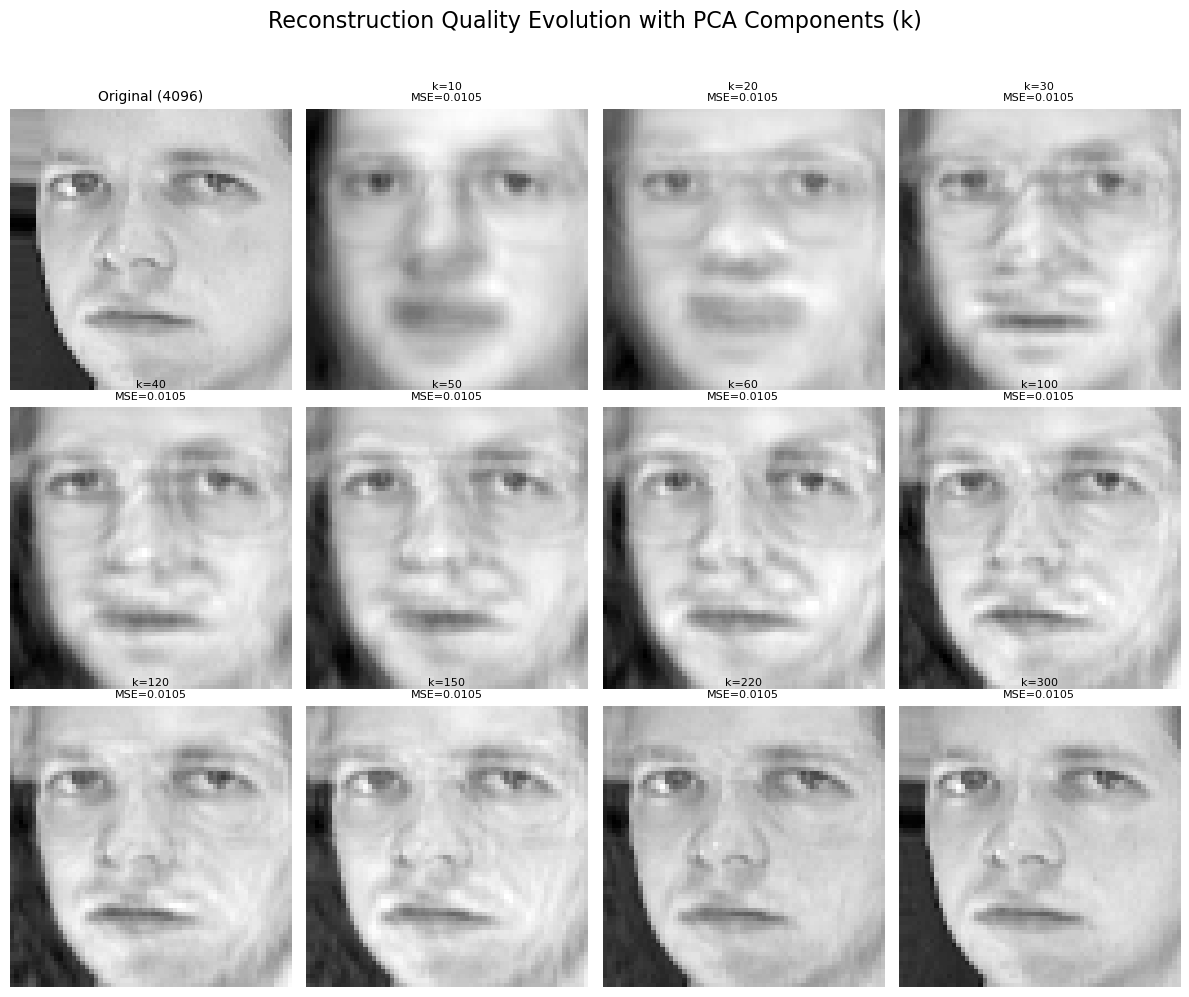

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math

data = fetch_olivetti_faces()
X = data.data # (400, 4096)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components_list = [10,20,30,40,50,60,100,120,150,220,300]
reconstructions = {}
mse_results = {}

for k in n_components:
    pca = PCA(n_components=k, random_state=42)
    pca.fit(X_scaled)

    img_index = 5
    original_scaled_image = X_scaled[img_index:img_index + 1] 

    X_compressed = pca.transform(original_scaled_image)
    X_reconstructed_scaled = pca.inverse_transform(X_compressed)

    original_image = X[img_index].reshape(64, 64) 
    reconstructed_image_unscaled = scaler.inverse_transform(X_reconstructed_scaled).reshape(64, 64)

    mse_value = mean_squared_error(
        original_image.flatten(), 
        reconstructed_image.flatten()
    )
    # Store results
    reconstructions[k] = reconstructed_image_unscaled
    mse_results[k] = mse_value
    print(f"k={k}: MSE={mse_value:.8f}")

n_plots = len(n_components_list)
n_cols = 4  
n_rows = math.ceil((n_plots + 1) / n_cols) # +1 for the original image

plt.figure(figsize=(3 * n_cols, 3.5 * n_rows))
plt.suptitle('Reconstruction Quality Evolution with PCA Components (k)', fontsize=16)

# Plot Original Image (Reference)
ax_orig = plt.subplot(n_rows, n_cols, 1)
ax_orig.imshow(original_image, cmap='gray')
ax_orig.set_title("Original (4096)", size=10)
ax_orig.axis('off')

# Plot All Reconstructions
for i, k in enumerate(n_components_list):
    ax = plt.subplot(n_rows, n_cols, i + 2) 
    ax.imshow(reconstructions[k], cmap='gray')
    
    mse = mse_results[k]
    ax.set_title(f"k={k}\nMSE={mse:.4f}", size=8) 
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">

*  Statistically, **123 components** are needed to retain $95\%$ of the information (variance) present in the original dataset. 
* From the displayed images the reconstruction becomes **visually acceptable** (i.e., the person is clearly recognizable) at a *lower* number of components around $k=50$ or $k=60$.

This experiment vividly demonstrates the high utility of PCA for high-dimensional, highly correlated data like images:

  * **Exceptional Redundancy Handling:** The ability to compress the image from 4096 dimensions to, **60 dimensions** while achieving visually near-perfect reconstruction (very low MSE) confirms the **extreme redundancy** present in the raw pixel values of the Olivetti dataset.
  * **Effective Feature Extraction:** PCA effectively discovers the underlying low-dimensional structure—the **intrinsic features** (eigenfaces) that define a human face. These features are much more useful for downstream tasks (like Logistic Regression classification) than the raw pixels.
  * **Optimal Trade-off:** This method allows a user to select a point (a value for $k$) that provides the **minimal necessary features** for a given quality threshold (e.g., MSE $< 0.01$). This leads to massive savings in storage and computational speed without sacrificing practical information.
  
</div>